# Federated Learning with Tensorflow

## Testing neural network

In [1]:
import tensorflow as tf


In [2]:
mnist= tf.keras.datasets.mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test= x_train/255.0, x_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

2022-01-22 15:10:32.033762: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [11]:


model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2957 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1421 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1082 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0896 - accuracy: 0.9721
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9751


[0.08132339268922806, 0.9750999808311462]

## Smart + Dataset 

### Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [2]:
path="/Users/daniel.bustillo/Documents/thesis"

In [3]:
os.chdir(path)

In [186]:
#Reading all years from House A
home_a_1= pd.read_csv("Dataset/HomeA/2014/HomeA-meter2_2014.csv",infer_datetime_format=True, index_col=0, parse_dates=True)
home_a_2= pd.read_csv("Dataset/HomeA/2014/HomeA-meter3_2014.csv",infer_datetime_format=True, index_col=0, parse_dates=True)

home_a_1_15= pd.read_csv("Dataset/HomeA/2015/HomeA-meter2_2015.csv",infer_datetime_format=True, index_col=0, parse_dates=True)
home_a_2_15= pd.read_csv("Dataset/HomeA/2015/HomeA-meter3_2015.csv",infer_datetime_format=True, index_col=0, parse_dates=True)

home_a_1_16= pd.read_csv("Dataset/HomeA/2016/HomeA-meter2_2016.csv",infer_datetime_format=True, index_col=0, parse_dates=True)
home_a_2_16= pd.read_csv("Dataset/HomeA/2016/HomeA-meter3_2016.csv",infer_datetime_format=True, index_col=0, parse_dates=True)


In [ ]:
#Reading all years from House B

# home_b_1 = pd.read_csv("Dataset/HomeB/2014/HomeB-meter1_2014.csv", infer_datetime_format=True, index_col=0, parse_dates=True)
# home_b_2 = pd.read_csv("Dataset/HomeB/2014/HomeB-meter2_2014.csv", infer_datetime_format=True, index_col=0, parse_dates=True)


In [ ]:
#Reading all years from House C
# home_c_1 = pd.read_csv("Dataset/HomeC/2014/HomeC-meter1_2014.csv", infer_datetime_format=True, index_col=0, parse_dates=True)
# home_c_2 = pd.read_csv("Dataset/HomeC/2014/HomeC-meter2_2014.csv", infer_datetime_format=True, index_col=0, parse_dates=True)


In [187]:
home_a_2_15= home_a_2_15.resample("30T").mean()
home_a_1_16=home_a_1_16.resample("30T").mean()
home_a_2_16 = home_a_2_16.resample("30T").mean()

In [188]:
home_a_2 =home_a_2.drop("use [kW]", axis=1)
home_a= home_a_1.merge(right= home_a_2, how="outer",left_index= True, right_index= True)

home_a_2_15 =home_a_2_15.drop("use [kW]", axis=1)
home_a_15= home_a_1_15.merge(right= home_a_2_15, how="outer",left_index= True, right_index= True)

home_a_2_16 =home_a_2_16.drop("use [kW]", axis=1)
home_a_16= home_a_1_16.merge(right= home_a_2_16, how="outer",left_index= True, right_index= True)


In [191]:
dfs=[home_a, home_a_15, home_a_16]

home_a= pd.concat(dfs)

In [192]:
home_a

,use [kW],gen [kW]_x,FurnaceHRV [kW],CellarOutlets [kW],WashingMachine [kW],FridgeRange [kW],DisposalDishwasher [kW],KitchenLights [kW],BedroomOutlets [kW],BedroomLights [kW],...,DuctHeaterHRV [kW],gen [kW]_y,ElectricRange [kW],Dryer [kW],GarageMudroomLights [kW],DiningRoomOutlets [kW],MudroomOutlets [kW],MasterBathOutlets [kW],GarageOutlets [kW],BasementOutdoorOutlets [kW]
Date & Time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0.0,0.0,0.195338,0.083204,0.005686,0.006892,0.005569,0.012154,0.020452,0.004899,...,0.382682,0.0,0.002883,0.005231,0.013155,0.0,0.0,0.0,0.0,0.0
2014-01-01 00:30:00,0.0,0.0,0.182158,0.036139,0.005679,0.094138,0.005412,0.005200,0.020571,0.008869,...,0.275576,0.0,0.003022,0.005441,0.012962,0.0,0.0,0.0,0.0,0.0
2014-01-01 01:00:00,0.0,0.0,0.134808,0.047034,0.005635,0.014786,0.005510,0.003173,0.020516,0.004901,...,0.346067,0.0,0.002979,0.005293,0.013107,0.0,0.0,0.0,0.0,0.0
2014-01-01 01:30:00,0.0,0.0,0.182125,0.071407,0.005672,0.082081,0.005445,0.003072,0.020506,0.004844,...,0.310117,0.0,0.002955,0.005317,0.012978,0.0,0.0,0.0,0.0,0.0
2014-01-01 02:00:00,0.0,0.0,0.092988,0.014203,0.005570,0.031901,0.005401,0.003154,0.020412,0.004841,...,0.309781,0.0,0.003059,0.005368,0.012886,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 21:30:00,0.0,0.0,0.140308,0.111428,0.000668,0.000987,0.000163,0.000017,0.007810,0.004730,...,0.000075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 22:00:00,0.0,0.0,0.102705,0.019827,0.000421,0.000985,0.000156,0.000016,0.007757,0.004719,...,0.000072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 22:30:00,0.0,0.0,0.102992,0.115550,0.000207,0.001022,0.000054,0.000007,0.007622,0.004661,...,0.000045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# home_b_2= home_b_2.drop('use [kW]', axis=1)

# home_b= home_b_1.merge(right=home_b_2, how='outer', left_index=True, right_index=True)

In [7]:
# home_c_2= home_c_2.drop('use [kW]', axis=1)

# home_c= home_c_1.merge(right=home_c_2, how='outer', left_index=True, right_index=True)

In [193]:
#sum all of the electricity consumption
def sum_power(df, label="total"):
    df[label] = df.sum(axis=1)
    return df

In [194]:
sum_power(home_a)
# sum_power(home_b)
# sum_power(home_c)

,use [kW],gen [kW]_x,FurnaceHRV [kW],CellarOutlets [kW],WashingMachine [kW],FridgeRange [kW],DisposalDishwasher [kW],KitchenLights [kW],BedroomOutlets [kW],BedroomLights [kW],...,gen [kW]_y,ElectricRange [kW],Dryer [kW],GarageMudroomLights [kW],DiningRoomOutlets [kW],MudroomOutlets [kW],MasterBathOutlets [kW],GarageOutlets [kW],BasementOutdoorOutlets [kW],total
Date & Time,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0.0,0.0,0.195338,0.083204,0.005686,0.006892,0.005569,0.012154,0.020452,0.004899,...,0.0,0.002883,0.005231,0.013155,0.0,0.0,0.0,0.0,0.0,0.795101
2014-01-01 00:30:00,0.0,0.0,0.182158,0.036139,0.005679,0.094138,0.005412,0.005200,0.020571,0.008869,...,0.0,0.003022,0.005441,0.012962,0.0,0.0,0.0,0.0,0.0,0.716727
2014-01-01 01:00:00,0.0,0.0,0.134808,0.047034,0.005635,0.014786,0.005510,0.003173,0.020516,0.004901,...,0.0,0.002979,0.005293,0.013107,0.0,0.0,0.0,0.0,0.0,0.667612
2014-01-01 01:30:00,0.0,0.0,0.182125,0.071407,0.005672,0.082081,0.005445,0.003072,0.020506,0.004844,...,0.0,0.002955,0.005317,0.012978,0.0,0.0,0.0,0.0,0.0,0.767058
2014-01-01 02:00:00,0.0,0.0,0.092988,0.014203,0.005570,0.031901,0.005401,0.003154,0.020412,0.004841,...,0.0,0.003059,0.005368,0.012886,0.0,0.0,0.0,0.0,0.0,0.568542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 21:30:00,0.0,0.0,0.140308,0.111428,0.000668,0.000987,0.000163,0.000017,0.007810,0.004730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.285912
2016-12-31 22:00:00,0.0,0.0,0.102705,0.019827,0.000421,0.000985,0.000156,0.000016,0.007757,0.004719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156306
2016-12-31 22:30:00,0.0,0.0,0.102992,0.115550,0.000207,0.001022,0.000054,0.000007,0.007622,0.004661,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.251503


In [195]:
#home_a['total'].plot(figsize=(25,5),logy=False, lw=1)

def plot_electricity(df, label="total", figsize=(25,5)):
    df[label].plot(figsize=figsize, lw=1)


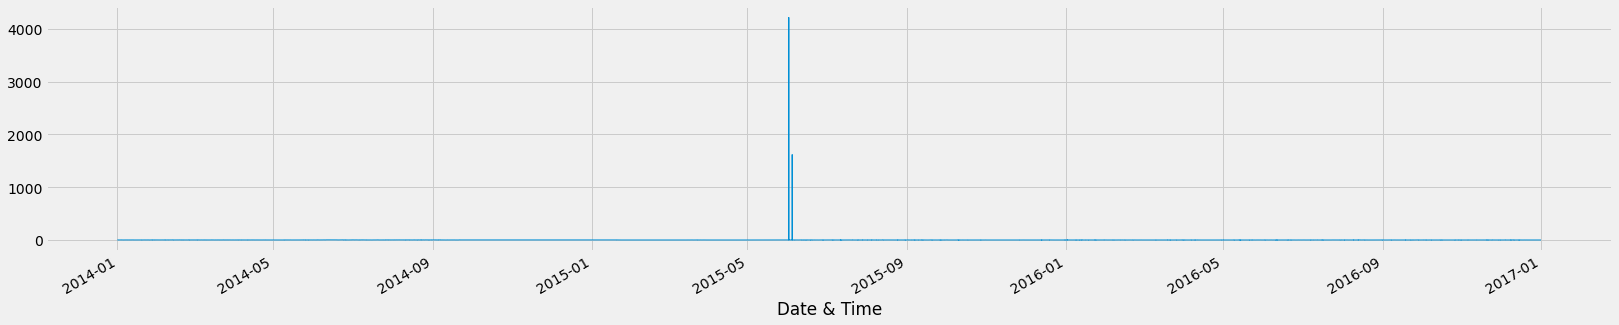

In [223]:
plot_electricity(home_a)
# plot_electricity(home_b)
# plot_electricity(home_c)

<AxesSubplot:xlabel='Date & Time'>

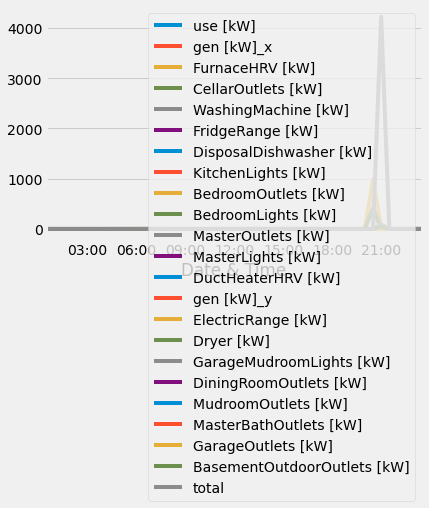

In [224]:
home_a.loc[(home_a.index>'2015-06-01')&(home_a.index<'2015-06-02')].plot()

In [213]:
home_a.describe()

,use [kW],gen [kW]_x,FurnaceHRV [kW],CellarOutlets [kW],WashingMachine [kW],FridgeRange [kW],DisposalDishwasher [kW],KitchenLights [kW],BedroomOutlets [kW],BedroomLights [kW],...,gen [kW]_y,ElectricRange [kW],Dryer [kW],GarageMudroomLights [kW],DiningRoomOutlets [kW],MudroomOutlets [kW],MasterBathOutlets [kW],GarageOutlets [kW],BasementOutdoorOutlets [kW],total
count,52610.0,52610.0,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000,...,51836.0,51836.000000,51836.000000,51836.000000,51836.000000,51836.000000,51836.000000,51836.000000,51836.000000,52614.000000
mean,0.0,0.0,0.171077,0.070056,0.003703,0.024884,0.008870,0.069313,0.026919,0.043538,...,0.0,0.074350,0.047180,0.031673,0.039593,0.012217,0.013699,0.005868,0.008299,1.080483
std,0.0,0.0,0.205706,0.039665,0.018354,0.047380,0.061520,10.258571,0.444707,7.892213,...,0.0,9.795457,3.581652,4.183426,6.190688,0.973998,1.336612,0.406882,0.962444,103.659354
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.018897,0.037305,0.000056,0.000923,0.000049,0.000014,0.006782,0.004626,...,0.0,0.002872,0.003385,0.003716,0.000000,0.000000,0.000000,0.000000,0.000000,0.209954
50%,0.0,0.0,0.087271,0.071004,0.000495,0.001042,0.000182,0.000075,0.011124,0.004699,...,0.0,0.003777,0.003808,0.004337,0.000151,0.002877,0.004657,0.004454,0.000559,0.348978
75%,0.0,0.0,0.200432,0.108267,0.005508,0.027254,0.004944,0.003246,0.016099,0.004896,...,0.0,0.003911,0.005506,0.012758,0.001803,0.002951,0.004841,0.006018,0.004387,0.765109
max,0.0,0.0,0.929004,0.458419,1.074639,0.992466,0.889513,2352.943984,100.787772,1810.228775,...,0.0,1999.719154,701.322889,948.435236,1012.706751,219.545362,252.917249,85.304971,213.680824,23344.265243


In [222]:
#Some manual data cleaning
# Replacing each columns max value with the mean
home_a= home_a.mask(
    home_a.eq(home_a.max(axis=0), axis=1),
    home_a.mean(axis=0).round(),
    axis=1)

### Simple ARIMA model

In [50]:
# simple ARIMA model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [57]:
#Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(home_a['total'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.046519
p-value: 0.000000


In [69]:
# # Original Series
# fig, axes = plt.subplots(3, 2, sharex=True)
# axes[0, 0].plot(home_a['total']); axes[0, 0].set_title('Original Series')
# plot_acf(home_a['total'], ax=axes[0, 1])

# # 1st Differencing
# axes[1, 0].plot(home_a['total'].diff()); axes[1, 0].set_title('1st Order Differencing')
# plot_acf(home_a['total'].diff().dropna(), ax=axes[1, 1])

# # 2nd Differencing
# axes[2, 0].plot(home_a['total'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# plot_acf(home_a['total'].diff().diff().dropna(), ax=axes[2, 1])

# plt.show()

In [70]:
#Fitting the model
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(home_a['total'], order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

/Users/daniel.bustillo/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daniel.bustillo/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daniel.bustillo/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/daniel.bustillo/opt/anaconda3/envs/t

                               SARIMAX Results                                
Dep. Variable:                  total   No. Observations:                17524
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -34068.326
Date:                Mon, 31 Jan 2022   AIC                          68144.652
Time:                        15:28:05   BIC                          68175.737
Sample:                             0   HQIC                         68154.888
                              - 17524                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9618      0.003   -334.255      0.000      -0.967      -0.956
ma.L1          0.6559      0.007     96.191      0.000       0.643       0.669
ma.L2         -0.0710      0.007    -10.350      0.0

### Some EDA 

In [87]:
home_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17524 entries, 2014-01-01 00:00:00 to 2014-12-31 23:30:00
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   use [kW]                     17524 non-null  float64
 1   gen [kW]_x                   17524 non-null  float64
 2   FurnaceHRV [kW]              17524 non-null  float64
 3   CellarOutlets [kW]           17524 non-null  float64
 4   WashingMachine [kW]          17524 non-null  float64
 5   FridgeRange [kW]             17524 non-null  float64
 6   DisposalDishwasher [kW]      17524 non-null  float64
 7   KitchenLights [kW]           17524 non-null  float64
 8   BedroomOutlets [kW]          17524 non-null  float64
 9   BedroomLights [kW]           17524 non-null  float64
 10  MasterOutlets [kW]           17524 non-null  float64
 11  MasterLights [kW]            17524 non-null  float64
 12  DuctHeaterHRV [kW]           17524 non-

In [35]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    # df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['night']= np.where((df['hour']>=18)|(df['hour']<6),1,0)
    
    # X = df[['hour','dayofweek','quarter','month','year',
    #        'dayofyear','dayofmonth']]
    # if label:
    #     y = df[label]
    #     return X, y
    # return X

# X, y = create_features(home_a, label='total')

# features_and_target = pd.concat([X, y], axis=1)

In [36]:
create_features(home_a)

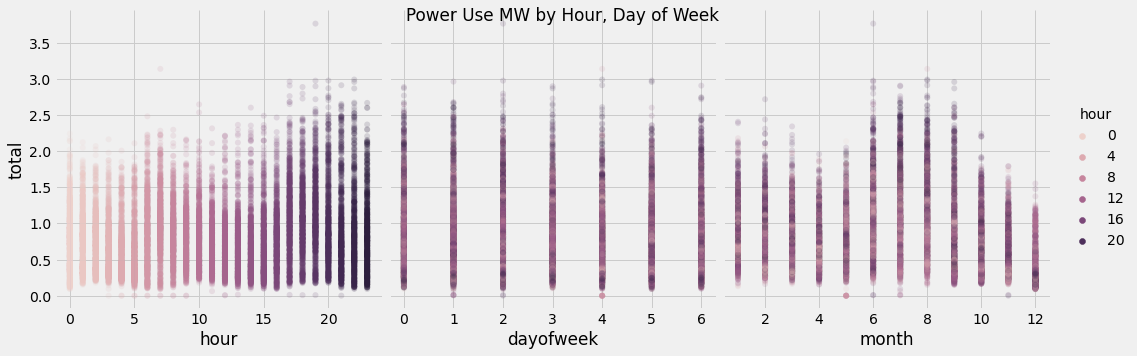

In [38]:

sns.pairplot(home_a.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek', 'month'],
             y_vars='total',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle('Power Use MW by Hour, Day of Week')
plt.show()


### Forecasting using Prophet


In [40]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [41]:
#Split date
date= "2014-09-18"
X_train = home_a.loc[home_a.index<= date].copy()
X_test = home_a.loc[home_a.index> date].copy()

<AxesSubplot:xlabel='Date & Time'>

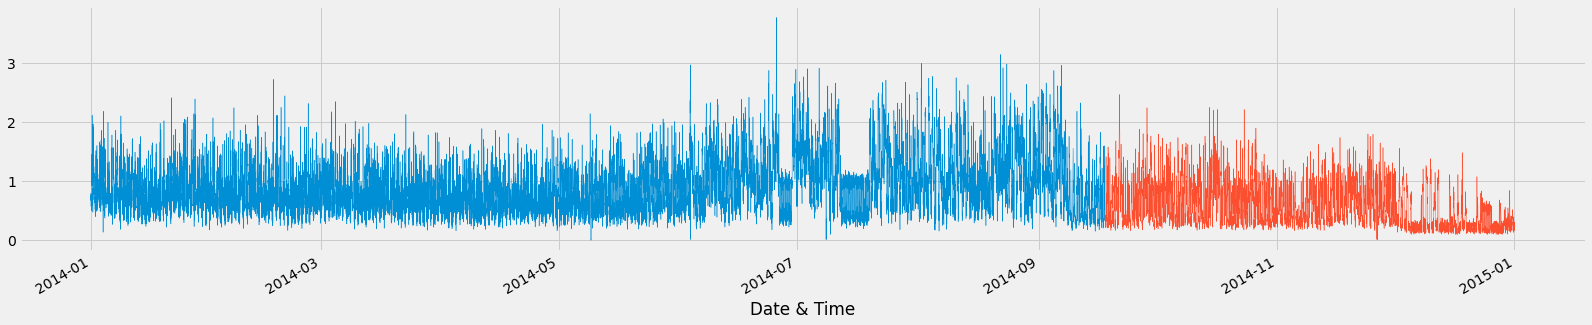

In [43]:
X_train['total'].plot(lw=0.5, figsize=(25,5))
X_test['total'].plot(lw=0.5)

In [106]:
# # Plot train and test so you can see where we have split
# X_train \
#     .rename(columns={'total': 'TRAIN SET'}) \
#     .merge(X_test.rename(columns={'total': 'TEST SET'}),
#           how='outer') \
#     .plot(figsize=(15,5), title='Train/test split', style='.',alpha= 0.5)
# plt.show()

In [44]:
X_train['ds']= X_train.index
X_test['ds'] = X_test.index

X_train = X_train[['ds','total']]
X_test = X_test[['ds','total']]

In [45]:
# Format data for prophet model using ds and y
X_train.reset_index() \
    .rename(columns={
                     'total':'y'}).head()

,Date & Time,ds,y
0,2014-01-01 00:00:00,2014-01-01 00:00:00,0.795101
1,2014-01-01 00:30:00,2014-01-01 00:30:00,0.716727
2,2014-01-01 01:00:00,2014-01-01 01:00:00,0.667612
3,2014-01-01 01:30:00,2014-01-01 01:30:00,0.767058
4,2014-01-01 02:00:00,2014-01-01 02:00:00,0.568542


In [46]:
X_train =X_train.reset_index()
X_train= X_train[['ds','total']]
X_train =X_train.rename(columns={"total":"y"})


In [110]:
X_train

,ds,y
0,2014-01-01 00:00:00,0.795101
1,2014-01-01 00:30:00,0.716727
2,2014-01-01 01:00:00,0.667612
3,2014-01-01 01:30:00,0.767058
4,2014-01-01 02:00:00,0.568542
...,...,...
12474,2014-09-17 22:00:00,1.259534
12475,2014-09-17 22:30:00,0.561248
12476,2014-09-17 23:00:00,0.329142
12477,2014-09-17 23:30:00,0.340821


In [47]:
model= Prophet(interval_width=0.95)
model.fit(X_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -118.185


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       21364.9    0.00237516       114.066      0.3992      0.9678      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       21367.2   8.41628e-05        52.545      0.6845      0.6845      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       21367.6   5.62759e-05       76.4444   3.503e-07       0.001      333  LS failed, Hessian reset 
     239       21367.7   0.000224119       149.748   4.299e-06       0.001      388  LS failed, Hessian reset 
     299       21367.9   0.000703793       123.143      0.1617      0.5807      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314         21368   5.29458e-05       87.8228   5.675e-07       0.001      531  LS failed, Hessian reset 
     399       21368.2   0.000295648 

In [48]:
X_test = X_test.reset_index().rename(columns={'total':'y'})

X_test=X_test[['ds','y']]

In [49]:
prediction= model.predict(X_test)

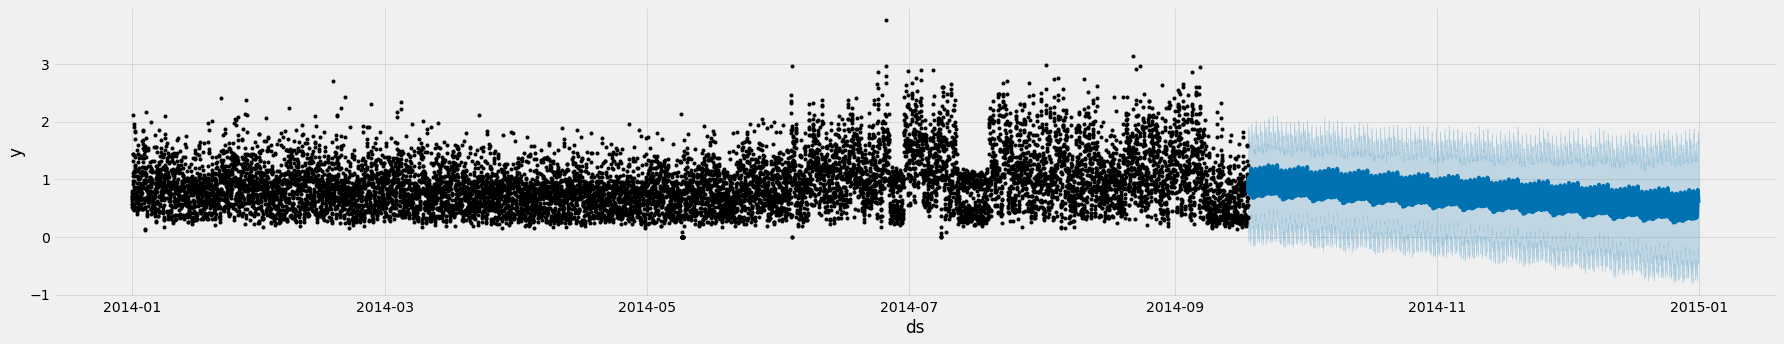

In [50]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(25)
fig = model.plot(prediction,
                 ax=ax)
plt.show()

### Using XGBoost for Time Series data

In [117]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [54]:
split_date = "2014-09-18"
home_train = home_a.loc[home_a.index <=split_date].copy()
home_test = home_a.loc[home_a.index >split_date].copy()

In [64]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    cols= df.columns
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['night'] = np.where((df['hour']>=18)| (df['hour']<6),1,0)
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth', 'night']]
    if label:
        y = df[label]
        return X, y
    return X, cols


In [65]:
X_train, y_train = create_features(home_train, label="total")
X_test, y_test = create_features(home_test, label="total")

In [108]:
X,y = create_features(home_a, label='total')

In [102]:
reg = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}


In [103]:
xgb_grid = GridSearchCV(reg,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [109]:
X=X.reset_index()
X.drop("Date & Time", axis=1,inplace=True)

In [123]:
X=X.values

array([[  0,   2,   1, ...,   1,   1,   1],
       [  0,   2,   1, ...,   1,   1,   1],
       [  1,   2,   1, ...,   1,   1,   1],
       ...,
       [ 22,   2,   4, ..., 365,  31,   1],
       [ 23,   2,   4, ..., 365,  31,   1],
       [ 23,   2,   4, ..., 365,  31,   1]])

In [118]:
tscv = TimeSeriesSplit(n_splits=5,
    gap=48,
    max_train_size=10000,
    test_size=1000)


In [114]:
all_splits = list(tscv.split(X, y))
train_0, test_0 = all_splits[0]

In [119]:
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )


evaluate(xgb_grid, X, y, cv=tscv)


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[17:52:34] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:52:34] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to

In [125]:

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    xgb_grid.fit(
        X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True)
    


Fitting 2 folds for each of 9 candidates, totalling 18 fits
[18:07:42] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:07:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:07:42] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[18:07:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to

In [112]:
xgb_grid.fit(X_train,y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[17:35:16] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:35:16] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:35:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    val

In [ ]:
home_test['prediction'] = xgb_grid.predict(X_test)

In [ ]:
home_all= pd.concat([home_train, home_test], sort=False)

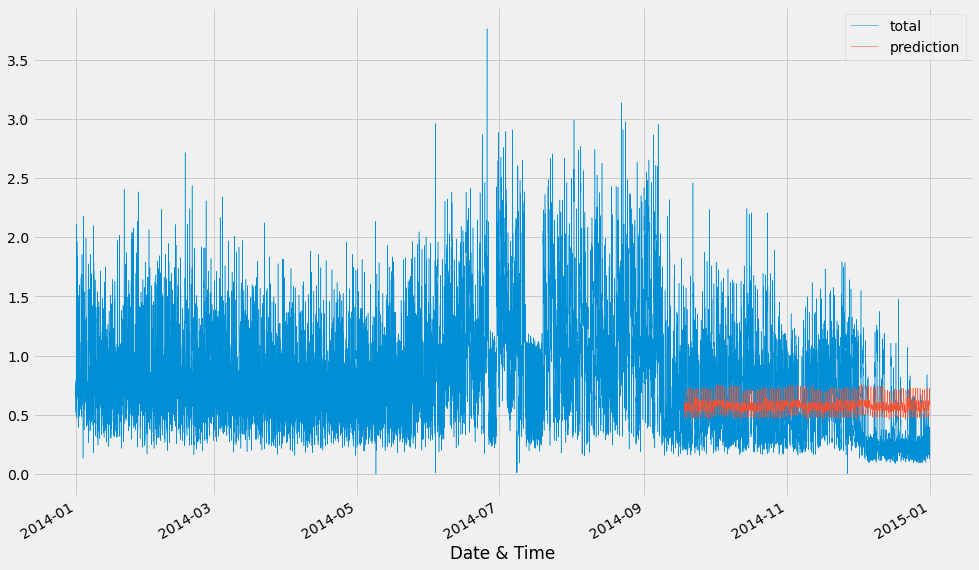

In [ ]:
_=home_all[['total','prediction']].plot(figsize=(15,10), lw=0.5)

### Using LSTMs 